__Plotting Passes, Shots, Goals, Player Positions and Trajectories with Metrica Datasets__

__Importing Metrica Events Dataset__

In [1]:
import Metrica_IO as mio
import Metrica_Viz as mviz
import pandas as pd
import csv

In [2]:
events = pd.read_csv('Sample_Game_2_RawEventsData.csv')

In [3]:
print(events.shape)
events.head()

(1935, 14)


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58


In [4]:
events['Type'].value_counts()

PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64

We can see that we have 1935 events and 14 columns overall in the dataset.

Converting the last 4 columns into metric.

In [5]:
def to_metric_coordinates(data,field_dimen=(106.,68.) ):
    x_columns = [c for c in data.columns if c[-1].lower()=='x']
    y_columns = [c for c in data.columns if c[-1].lower()=='y']
    data[x_columns] = ( data[x_columns]-0.5 ) * field_dimen[0]
    data[y_columns] = -1 * ( data[y_columns]-0.5 ) * field_dimen[1]
    
events = mio.to_metric_coordinates(events)
events.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44


In [6]:
#Get events by team
home_events = events[events['Team']=='Home']
away_events = events[events['Team']=='Away']

#Frequency of each event type by team
print(home_events['Type'].value_counts())
print(away_events['Type'].value_counts())

PASS              543
CHALLENGE         160
RECOVERY          135
BALL LOST         120
SET PIECE          34
BALL OUT           27
SHOT               13
FAULT RECEIVED      9
CARD                3
Name: Type, dtype: int64
PASS              421
CHALLENGE         151
RECOVERY          113
BALL LOST         113
SET PIECE          46
BALL OUT           22
SHOT               11
FAULT RECEIVED     11
CARD                3
Name: Type, dtype: int64


In [7]:
#Get all shots
shots = events[events['Type']=='SHOT']
home_shots = home_events[home_events['Type']=='SHOT']
away_shots = away_events[away_events['Type']=='SHOT']

#Look at frequency of each shot Subtype
print(home_shots['Subtype'].value_counts())
print(away_shots['Subtype'].value_counts())

ON TARGET-SAVED        4
HEAD-OFF TARGET-OUT    4
ON TARGET-GOAL         2
OFF TARGET-OUT         2
HEAD-ON TARGET-GOAL    1
Name: Subtype, dtype: int64
OFF TARGET-OUT         3
ON TARGET-GOAL         2
BLOCKED                2
ON TARGET-SAVED        2
OFF TARGET-HEAD-OUT    1
HEAD-OFF TARGET-OUT    1
Name: Subtype, dtype: int64


In [8]:
#Get the shots that led to a goal
home_goals = home_shots[home_shots['Subtype'].str.contains('-GOAL')].copy()
away_goals = away_shots[away_shots['Subtype'].str.contains('-GOAL')].copy()

home_goals.head(10)

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72


In [9]:
away_goals.head(10)

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,-40.28,-1.36,-55.12,-2.72


We can see that Home team scored 3 and the Away team scored 2.

In [10]:
#Add a column event 'Minute' to the data frame
home_goals['Minute'] = home_goals['Start Time [s]']/60.
away_goals['Minute'] = home_goals['Start Time [s]']/60.

In [11]:
#See the events that lead up to the goal that is under the index 823
events.loc[818:823]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
818,Away,PASS,HEAD,1,52696,2107.84,52746,2109.84,Player17,Player18,-1.06,7.48,-5.30,18.36
819,Away,PASS,NaN,1,52784,2111.36,52807,2112.28,Player18,Player21,-3.18,22.44,1.06,12.24
820,Away,PASS,NaN,1,52871,2114.84,52936,2117.44,Player21,Player19,2.12,12.92,30.74,-26.52
821,Away,PASS,NaN,1,52941,2117.64,52971,2118.84,Player19,Player23,30.74,-27.20,37.10,-15.64
822,Away,PASS,NaN,1,53027,2121.08,53045,2121.80,Player23,Player24,41.34,-9.52,44.52,2.72
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36


__Plotting the passes and the goal__

Text(44.52, 2.719999999999999, 'GOAL')

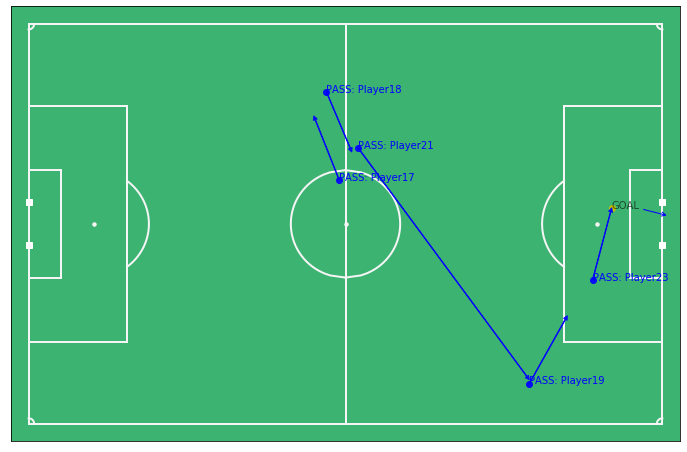

In [12]:
#plotting the pitch
fig,ax = mviz.plot_pitch()

#Plotting passing move in run up to goal 
mviz.plot_events(events.loc[818:822], figax=(fig,ax), indicators = ['Marker','Arrow'], color='b', marker_style = 'o', alpha=0.9, annotate=True)

#Plotting the second goal 
ax.plot(events.loc[823]['Start X'], events.loc[823]['Start Y'], 'yo')
ax.annotate("GOAL", xytext=events.loc[823][['Start X','Start Y']], xy=events.loc[823][['End X','End Y']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='b'))

__Plotting all the shots by one specific player__

In [13]:
shots["From"].value_counts()

Player9      4
Player10     3
Player24     2
Player19     2
Player5      2
Player20     2
Player22     1
Player21     1
Player23     1
Player3      1
Player 26    1
Player12     1
Player7      1
Player4      1
Player18     1
Name: From, dtype: int64

We can see that the Player9 had the most shots, so let's plot all of his shots.

In [14]:
shots_from_9 = shots[shots["From"] == 'Player9'].copy()

In [15]:
shots_from_9.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.8,Player9,NaN,47.70,-1.36,54.06,-2.04
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.8,Player9,NaN,41.34,-7.48,54.06,5.44
1756,Home,SHOT,HEAD-OFF TARGET-OUT,2,124336,4973.44,124365,4974.6,Player9,NaN,45.58,-0.00,55.12,-7.48
1927,Home,SHOT,ON TARGET-SAVED,2,139891,5595.64,139925,5597.0,Player9,NaN,21.20,-1.36,50.88,-1.36


Text(21.199999999999996, -1.3600000000000012, '4')

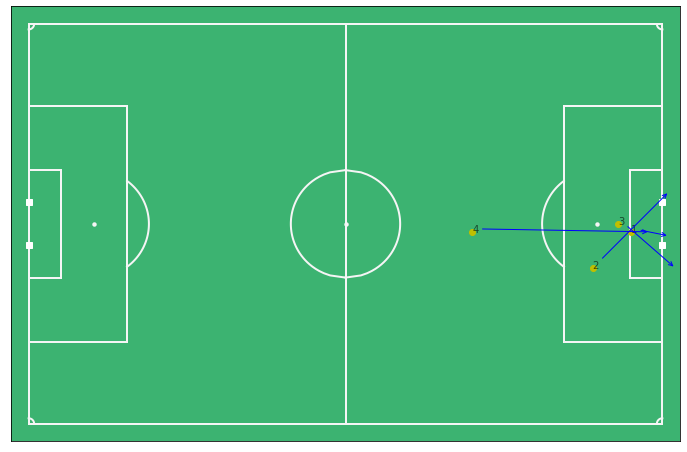

In [16]:
#Plotting the first shot
fig,ax = mviz.plot_pitch()

ax.plot(events.loc[1118]['Start X'], events.loc[1118]['Start Y'], 'yo')
ax.annotate("1", xytext=events.loc[1118][['Start X','Start Y']], xy=events.loc[1118][['End X','End Y']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='b'))

ax.plot(events.loc[1681]['Start X'], events.loc[1681]['Start Y'], 'yo')
ax.annotate("2", xytext=events.loc[1681][['Start X','Start Y']], xy=events.loc[1681][['End X','End Y']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='b'))

ax.plot(events.loc[1756]['Start X'], events.loc[1756]['Start Y'], 'yo')
ax.annotate("3", xytext=events.loc[1756][['Start X','Start Y']], xy=events.loc[1756][['End X','End Y']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='b'))

ax.plot(events.loc[1927]['Start X'], events.loc[1927]['Start Y'], 'yo')
ax.annotate("4", xytext=events.loc[1927][['Start X','Start Y']], xy=events.loc[1927][['End X','End Y']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='b'))

The number 1 shot in this plot, is the shot under 1118 index which ended up being a goal. Also, worth mentioning that out of 4 shots that was the closest to the goals.

__Plotting the positions of all players when Player 9 scored with Tracking Dataset__

In [17]:
# set up initial path to data
DATADIR = 'C:/Users/User/Desktop/Datasets/This is the fourth lecture/sample-data-master/sample-data-master/data'
game_id = 2 # let's look at sample match 2

In [18]:
# READING IN TRACKING DATA
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

# Look at the column namems
print( tracking_home.columns )

# Convert positions from metrica units to meters 
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

Reading team: home
Reading team: away
Index(['Period', 'Time [s]', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
       'Home_5_x', 'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y',
       'Home_8_x', 'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x',
       'Home_10_y', 'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y',
       'Home_14_x', 'Home_14_y', 'ball_x', 'ball_y'],
      dtype='object')


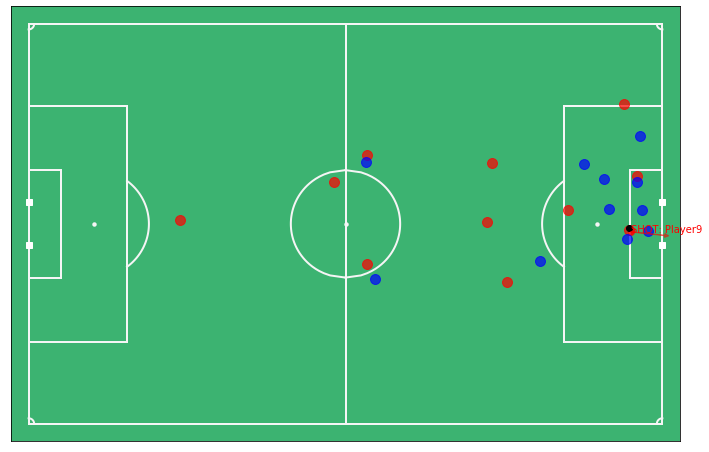

In [19]:
#PLOT POISTIONS AT GOAL
fig,ax = mviz.plot_events( events.loc[1118:1118], indicators = ['Marker','Arrow'], annotate=True )
goal_frame = events.loc[1118]['Start Frame']
fig,ax = mviz.plot_frame(tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax = (fig,ax))

We can see from the plot that it was a regular attack while in possesion. Most of the players of the opponent, 8 players to be more specific, were within 15 metres from the goal.

__Plotting some player trajectories within the first 60 seconds (25 frames per second)__

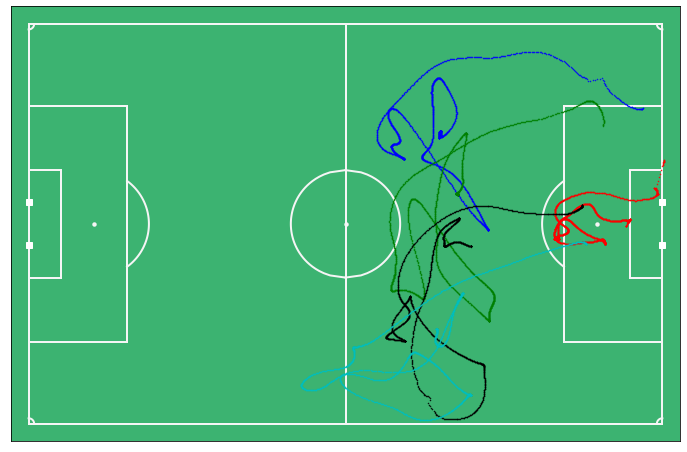

In [20]:
#Plot some player trajectories (players 11,1,2,3,4)
fig,ax = mviz.plot_pitch()
ax.plot( tracking_home['Home_11_x'].iloc[:1500], tracking_home['Home_11_y'].iloc[:1500], 'r.', MarkerSize=1)
ax.plot( tracking_home['Home_1_x'].iloc[:1500], tracking_home['Home_1_y'].iloc[:1500], 'b.', MarkerSize=1)
ax.plot( tracking_home['Home_2_x'].iloc[:1500], tracking_home['Home_2_y'].iloc[:1500], 'g.', MarkerSize=1)
ax.plot( tracking_home['Home_3_x'].iloc[:1500], tracking_home['Home_3_y'].iloc[:1500], 'k.', MarkerSize=1)
ax.plot( tracking_home['Home_4_x'].iloc[:1500], tracking_home['Home_4_y'].iloc[:1500], 'c.', MarkerSize=1)

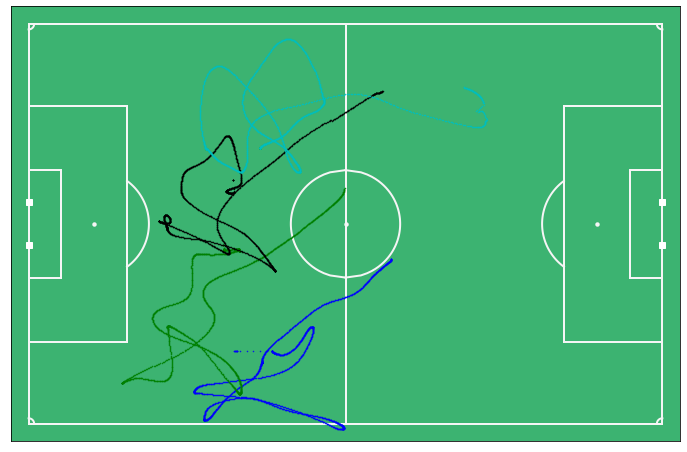

In [21]:
##### Plot some player trajectories (players 11,1,2,3,4)
fig,ax = mviz.plot_pitch()
ax.plot(tracking_away['Away_15_x'].iloc[:1500], tracking_away['Away_15_y'].iloc[:1500], 'b.', MarkerSize=1)
ax.plot(tracking_away['Away_16_x'].iloc[:1500], tracking_away['Away_16_y'].iloc[:1500], 'g.', MarkerSize=1)
ax.plot(tracking_away['Away_17_x'].iloc[:1500], tracking_away['Away_17_y'].iloc[:1500], 'k.', MarkerSize=1)
ax.plot(tracking_away['Away_18_x'].iloc[:1500], tracking_away['Away_18_y'].iloc[:1500], 'c.', MarkerSize=1)

In both cases we can guess that these are the trajectories of deffensive players and for the goalkeeper in the first plot.